<a href="https://colab.research.google.com/github/harnalashok/DataVisualization/blob/master/advertising_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 12th May 2022
# Data source: Kaggle: https://www.kaggle.com/fayomi/advertising
#
# Spyder note: Use F9 in Spyder to execute a line and advance
#
# objectives:
#           Discover relationships and existence of pattern
#           in data
#              i)  Feature Engineering for categorical variables
#             ii)  Extracting datetime components
#             iii) Behaviour of 'apply' vs 'map' for Series
#              iv)  Learning to draw various types of graphs
#               v)  Conditional plots using catplot
#              vi)  Relationship plots using relplot
#             vii)  Learning seaborn plots
#            viii)  Looking at structure in data
#                       a. Parallel coordinates plots
#                       b. Radviz plots
#                       c. Andrews curves

# Good reference: https://seaborn.pydata.org/introduction.html


## Call libraries

In [9]:

# 1.0 Call libraries
%reset -f
# 1.1 For data manipulations
import numpy as np
import pandas as pd
from numpy.random import default_rng

# 1.2 For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl     # For creating colormaps

# 1.3 For data processing
from sklearn.preprocessing import StandardScaler

# 1.4 OS related
import os

# 1.5 for working in ipython
#%matplotlib qt5
#%matplotlib inline


In [10]:
#1.6 From a cell display outputs from multiple commands:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
# 1.6.1 For generating random numbers:
rng = default_rng()

In [12]:
# 1.7 Mount google drive:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [13]:
# 1.8 Go to folder containing data file
path = "/gdrive/MyDrive/Colab_data_files/advertising"


In [14]:
# 1.8.1 Change working directory
os.chdir(path)

# 1.8.2 list files
os.listdir()            # List all files in the folder


['advertising (1).zip',
 'advertising_data_visualization seaborn.py',
 'advertising.zip']

## Read data

In [ ]:
# 1.9 Read file and while reading file,
#      convert feature named 'Timestamp' 
#       to datetime time:

ad = pd.read_csv("advertising.zip",
                  parse_dates = ['Timestamp']    # Parse this column as dates
                )

In [ ]:
# 1.9.1 Some dataset display related options:

pd.options.display.max_columns = 100
pd.set_option("display.max.columns" , 100)

In [ ]:
# 1.9.2 Check data types of attributes
#       Should 'Age' be int64?
ad.dtypes

Daily Time Spent on Site           float64
Age                                  int64
Area Income                        float64
Daily Internet Usage               float64
Ad Topic Line                       object
City                                object
Male                                 int64
Country                             object
Timestamp                   datetime64[ns]
Clicked on Ad                        int64
dtype: object

In [ ]:
# 1.9.3
ad.head(3)
ad.info()               # Also informs how much memory dataset takes
                        #   and status of nulls

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


In [ ]:
# 1.9.4
ad.shape                # (1000, 10)
ad.columns.values
len(ad)  

(1000, 10)

array(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'], dtype=object)

1000

In [ ]:
# 1.10 Categorical data value counts
#     Or number of levels per category
len(ad.City.unique())                   # 969 cities out of 1000
ad.City.value_counts()

969

Lisamouth         3
Williamsport      3
Wrightburgh       2
Lake Jose         2
Robertfurt        2
                 ..
Burgessside       1
Hurleyborough     1
Garychester       1
East Kevinbury    1
Ronniemouth       1
Name: City, Length: 969, dtype: int64

In [ ]:
# 1.10.1 How many conutries
len(ad.Country.unique())                # 237 countries
ad.Country.value_counts()               # Mostly 2 per country

237

France                                                 9
Czech Republic                                         9
Peru                                                   8
Turkey                                                 8
Greece                                                 8
                                                      ..
Romania                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Germany                                                1
Aruba                                                  1
Lesotho                                                1
Name: Country, Length: 237, dtype: int64

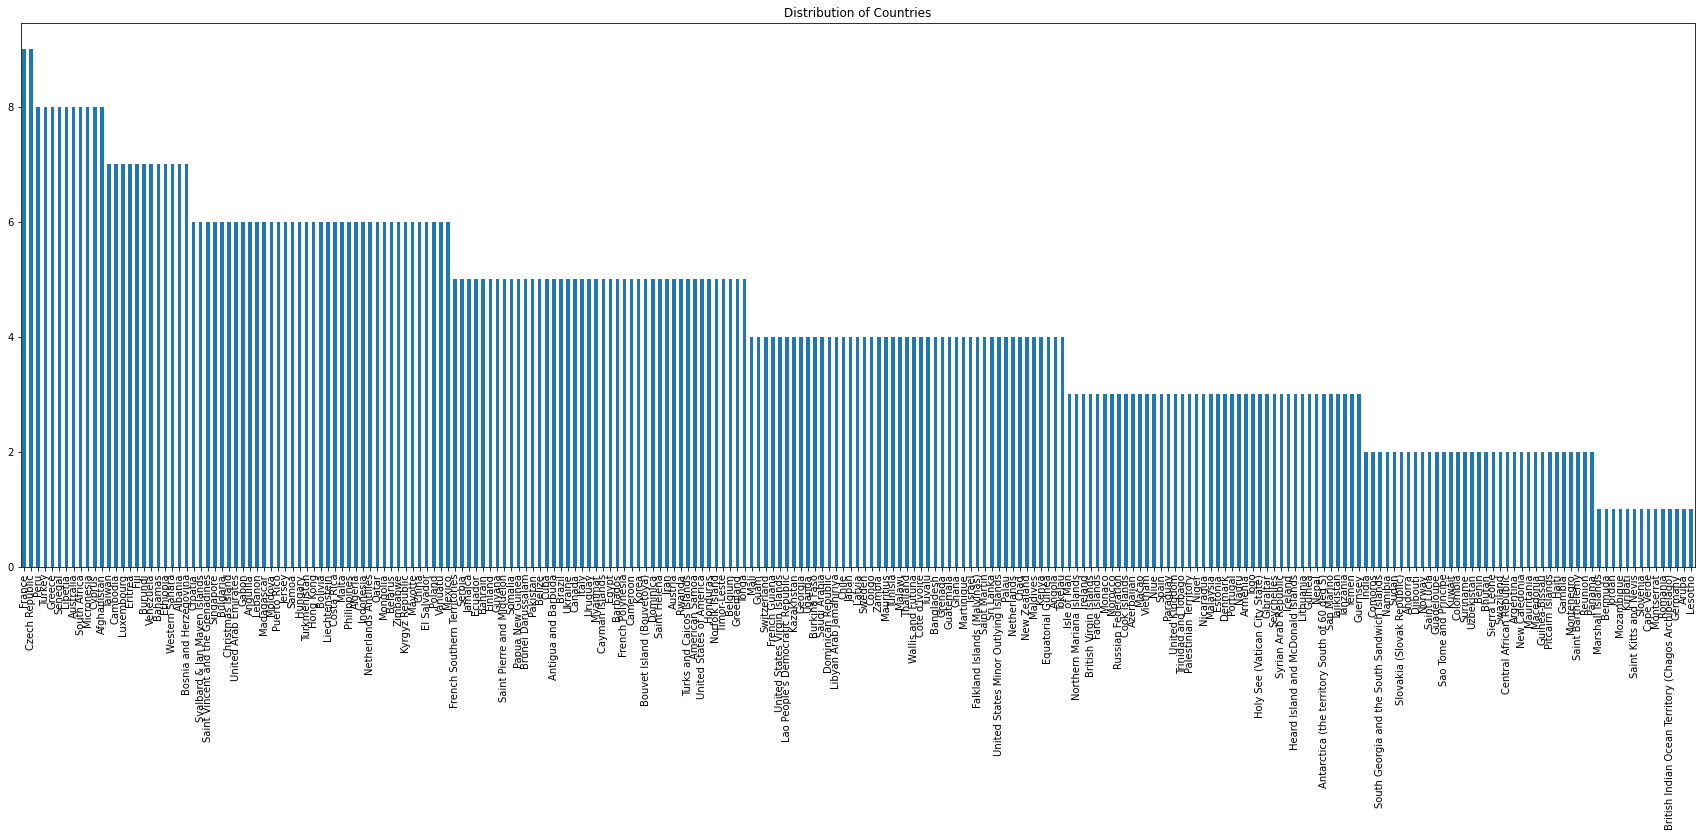

In [ ]:
# 1.10.2 Plot the above distribution:
cntry = ad.Country.value_counts() 
cntry.plot(
           kind = 'bar',
           figsize = (30,10),
           title = "Distribution of Countries"
           ) ;

In [ ]:
# 1.10.3 Distribution of gender
ad.Male.value_counts()                  # 519:481


0    519
1    481
Name: Male, dtype: int64

In [ ]:
# 1.10.4 Distribution of clicks
ad['Clicked on Ad'].value_counts()      # 1 and 0 in the ratio of 500:500
                                        # This is highly optimistic. Genrally clicks may be 1%


0    500
1    500
Name: Clicked on Ad, dtype: int64

## Feature Engineering

In [ ]:
#############################
# 2.0 Engineering  features + More
#############################

## Discretisation
#   a. Cut column 'Age' into 3 equal parts--age_cat
#   b. Cut 'Area Income' into 3 equal parts
#   c. Create a column of length of  'Ad Topic Line'
#   d. Create a column of no of words in  'Ad Topic Line'
## Replace by Category count
#   e. Create a column of 'City' count
#   f. Create a column of 'Country' count
#   g. Create a column of 'City' & 'Country' count
## Date and time columns
#   h. Extract from Timestamp, hour-of-day, weekday, months
## Using 'map'
#   i.Transform 'hour_of_day' to "earlymorning", "morning", "afternoon", "evening", "night","latenight"
#   j. Transform 'weekday' to 0,1,2,3,4,5,6
#   k. Transform months to Qtr1, Qtr2, Qtr3, Qtr4
## Rename columns
#   l. Assign new and shorter column names to a few columns


#### Continuous to discrete

### A quick demo of cut and qcut

In [ ]:
# 1.11
rnd = rng.integers(10,100, size = (16))
rnd.sort()
rnd
demo = pd.DataFrame({'a' : rnd} )
demo

array([21, 23, 26, 29, 30, 34, 35, 43, 60, 62, 71, 72, 78, 86, 94, 97])

,a
0,21
1,23
2,26
3,29
4,30
5,34
6,35
7,43
8,60
9,62


In [ ]:
# 1.12
pd.qcut(demo['a'], 4, labels = list('abcd'))
pd.cut(demo['a'], 4, labels = list('wxyz'))

0     a
1     a
2     a
3     a
4     b
5     b
6     b
7     b
8     c
9     c
10    c
11    c
12    d
13    d
14    d
15    d
Name: a, dtype: category
Categories (4, object): ['a' < 'b' < 'c' < 'd']

0     w
1     w
2     w
3     w
4     w
5     w
6     w
7     x
8     y
9     y
10    y
11    y
12    y
13    z
14    z
15    z
Name: a, dtype: category
Categories (4, object): ['w' < 'x' < 'y' < 'z']

In [ ]:
# 2.1 Descretise continuos columns
#     These are equal width bins as against
#     equal data-points bins (quantile) or kmeans clusters
#     Alternatively use KBinsDiscretizer of sklearn

ad["age_cat"] = pd.cut(
                       ad['Age'],
                       bins = 3,           # Else devise your bins: [0,20,60,110]
                       labels= ["y", "m", "s"]
                      )


In [ ]:
# 2.1.1
ad["area_income_cat"] = pd.cut(
                               ad['Area Income'],
                               bins = 3,
                               labels= ["l", "m", "h"]
                               )


#### Feature eng for text column

In [ ]:
# 2.2 Create a new column as per length of each ad-line
#     Both the following lines do the same thing

ad['AdTopicLineLength'] = ad['Ad Topic Line'].apply(lambda x : len(x))
ad['AdTopicLineLength'] = ad['Ad Topic Line'].map(lambda x : len(x))


In [ ]:
# 2.3 Create a new column as per number of words in each ad-line
# Try "good boy".split(" ")  and len("good boy.split(" "))

"good boy".split(" ")             # ['good', 'boy']
len("good boy".split(" "))        # 2
ad['Ad Topic Line'].map(lambda x : len(x.split(" ")))


['good', 'boy']

2

0      3
1      3
2      3
3      3
4      3
      ..
995    3
996    3
997    3
998    3
999    3
Name: Ad Topic Line, Length: 1000, dtype: int64

In [ ]:
# 2.3.1 Note the use of apply(). This apply() works on complete Series
#       to transform it rather than to summarise it as in groupby.

ad['AdTopicNoOfWords'] = ad['Ad Topic Line'].apply(lambda x : len(x.split(" ")))   # Note the use of apply()
                                                                                   # This apply works on complete Series


In [ ]:
# 2.4 A column that has countd of City and
#       another column with count of Country columns
#       Note the use of transform method here:
#grouped = ad.groupby(['City'])
#ad['City_count'] = grouped['City'].transform('count')   # count is a groupby method

# 2.4.1 Same way for country
#grouped = ad.groupby(['Country'])
#ad['Country_count'] = grouped['Country'].transform('count')   # count is a groupby method


# 2.5 Extract date components using Series.dt accessor
#     https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-dt
#     https://pandas.pydata.org/pandas-docs/stable/reference/series.html#datetime-properties


#### Feature Eng for Timestamp

In [ ]:
# 2.6 What is the type of 'dt'

type(ad['Timestamp'].dt)    # Accessor like get()
                            # pandas.core.indexes.accessors.DatetimeProperties


pandas.core.indexes.accessors.DatetimeProperties

In [ ]:
ad['hour'] = ad['Timestamp'].dt.hour

In [ ]:
pd.cut(ad['hour'], bins = [0,5,9,12,16,20, 24] , labels= ["em", "m", "d", "af", "ev", "night"])

0        NaN
1         em
2         ev
3         em
4         em
       ...  
995    night
996       em
997       ev
998       em
999    night
Name: hour, Length: 1000, dtype: category
Categories (6, object): ['em' < 'm' < 'd' < 'af' < 'ev' < 'night']

In [ ]:
# 2.7 Extract hour, weekday and month
ad['hourOfDay']    = ad['Timestamp'].dt.hour
ad['weekday']      = ad['Timestamp'].dt.weekday
ad['quarter']      = ad['Timestamp'].dt.month # First we get month. Then we map month to quarter
                                              #   See below


In [ ]:
# 2.8 Cut hour to morning, evening, night etc
#     For example 0 to 6am is earlymorning

# 2.8.1 For easy interpretation of graphs, use l1
l1 = ["earlymorning", "morning", "afternoon", "evening", "night","latenight"]

# 2.8.2 For Radviz plot and Parallel charts use l2
l2 = [1,2,3,4,5,6]

# 2.8.3
#ad["hour"] = pd.cut(ad['hourOfDay'], bins = [-1,6,12,17,20,22,24], labels = l1)
ad["hour"] = pd.cut(ad['hourOfDay'], bins = [-1,6,12,17,20,22,24], labels = l2)


In [ ]:
# 3.0 Similarly for weekdays
#     Map weekday numbers to weekday names
#     We use Series.map() method

mymap = {0 : 'Monday', 1 : 'Tuesday', 2: 'Wednesday',
         3: 'Thursday',4: 'Friday',   5: 'Saturday', 6: 'Sunday' }


In [ ]:
# 3.0.1 For easy interpretation of weekdays in graphs
#ad['weekday'] = ad['weekday'].map(mymap)

ad['weekday'].head(2)


0    6
1    0
Name: weekday, dtype: int64

In [ ]:
# 4.0 We use Series.map() method again but this time instead of supplying
#      a dictionary to dictate transformation, we use a function for
#        transformation
"""
### map vs apply in Series
# https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas
What is desired result here?
Examine each value of month and transform it to
Qtr-1 or Qtr-2 etc. Thus our function is not operating
on a whole Series (like fillna() or like median()) but on
value.
'map' method takes one value from Series at a time.
'map' operates in the following manner:
    a. Pass an element to function
    b. Function processes that value and returns a value
    c. map 'appends' that processed value to earlier processed values
    d. Repeat steps a to c for all values in the Series
    e. At the end, return the processed Series
 Refer: https://stackoverflow.com/a/19798528/3282777

For example:
    ad['month'].map(lambda x: x.max() - x.min())
    Gives an error:

        'int' object has no attribute 'max'
    Same error happens if I use, 'apply'

    ad['month'].apply(lambda x: x.max() - x.min())

Thus, both 'apply' and 'map' methods of Series take a value as
input at a time.

### apply in DataFrame
map() method does not work for DataFrame. 'apply' does.

This 'normalization' works:

    ad[['month','Age']].apply(lambda x: x/(x.max() - x.min()))

That is, apply method of DataFrame takes a Series AND NOT value as input.

"""


"\n### map vs apply in Series\n# https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas\nWhat is desired result here?\nExamine each value of month and transform it to\nQtr-1 or Qtr-2 etc. Thus our function is not operating\non a whole Series (like fillna() or like median()) but on\nvalue.\n'map' method takes one value from Series at a time.\n'map' operates in the following manner:\n    a. Pass an element to function\n    b. Function processes that value and returns a value\n    c. map 'appends' that processed value to earlier processed values\n    d. Repeat steps a to c for all values in the Series\n    e. At the end, return the processed Series\n Refer: https://stackoverflow.com/a/19798528/3282777\n\nFor example:\n    ad['month'].map(lambda x: x.max() - x.min())\n    Gives an error:\n\n        'int' object has no attribute 'max'\n    Same error happens if I use, 'apply'\n\n    ad['month'].apply(lambda x: x.max() - x.min())\n\nThus, bot

In [ ]:
# 4.01  For easy interprettaion in charts, use month1(), else month2()
def month1(x):
    if 0 < x <= 3:
        return "Q1"            # Quarter 1
    if 3 < x <= 6:
        return "Q2"            # Quarter 2
    if 6 < x <= 9:
        return "Q3"            # Quarter 3
    if 9 < x <= 12:
        return "Q4"            # Quarter 4


In [ ]:
# 4.02
def month2(x):
    if 0 < x <= 3:
        return 1            # Quarter 1
    if 3 < x <= 6:
        return 2            # Quarter 2
    if 6 < x <= 9:
        return 3            # Quarter 3
    if 9 < x <= 12:
        return 4            # Quarter 4


In [ ]:
#ad['quarter'] = ad['quarter'].map(lambda x : month1(x))   # Which quarter clicked
ad['quarter'] = ad['quarter'].map(lambda x : month2(x))   # Which quarter clicked
ad[['Timestamp','quarter']].head(2)   # Just check

,Timestamp,quarter
0,2016-03-27 00:53:11,1
1,2016-04-04 01:39:02,2


#### Columns renaming

In [ ]:
# 4.1 So finally what are col names?
ad.columns.values
ad.shape               # (1000, 18)  Earlier shape was (1000, 10)


array(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'age_cat', 'area_income_cat',
       'AdTopicLineLength', 'AdTopicNoOfWords', 'hour', 'hourOfDay',
       'weekday', 'quarter'], dtype=object)

(1000, 18)

In [ ]:
# 4.2 Let us rename some columns; remove spaces

new_col_names  = {
                 'Daily Time Spent on Site' :  'DailyTimeSpentonSite',
                 'Area Income'              : 'AreaIncome',
                 'Daily Internet Usage'     : 'DailyInternetUsage',
                 'Clicked on Ad'            : 'Clicked_on_ad',
                 'Male'                     : 'Gender'
              }


In [ ]:
# 4.2.1
ad.rename(
         columns = new_col_names,
         inplace = True,
         #axis = 1             # Note the axis keyword. By default it is axis = 0
         )


In [ ]:

ad.head(3)
ad.columns.values


,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked_on_ad,age_cat,area_income_cat,AdTopicLineLength,AdTopicNoOfWords,hour,hourOfDay,weekday,quarter
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,m,h,34,3,1,0,6,1
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,y,h,34,3,1,1,0,2
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,y,h,32,3,4,20,6,1


array(['DailyTimeSpentonSite', 'Age', 'AreaIncome', 'DailyInternetUsage',
       'Ad Topic Line', 'City', 'Gender', 'Country', 'Timestamp',
       'Clicked_on_ad', 'age_cat', 'area_income_cat', 'AdTopicLineLength',
       'AdTopicNoOfWords', 'hour', 'hourOfDay', 'weekday', 'quarter'],
      dtype=object)

## Plotting

### About plots

In [ ]:
##################
# 5 Plotting
##################
# A summary of syntax of important plots
#---------------------------------------
# 1. sns.displot()
#    (note: sns.distplot() is depreciated)
# https://seaborn.pydata.org/generated/seaborn.distplot.html
# https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot
# displot(data=None, *, x=None, y=None, hue=None, row=None,
#         col=None, weights=None, kind='hist', rug=False,
#         rug_kws=None, log_scale=None, legend=True, palette=None,
#         hue_order=None, hue_norm=None, color=None, col_wrap=None,
#         row_order=None, col_order=None, height=5, aspect=1, facet_kws=None,
#         **kwargs)
#         kind: 'hist', 'kde', 'ecdf'
###$$$$
# Note: 'displot' DOSES not take 'ax' argument. So if you need to use, 'ax'
#       argument, use: histplot, kdeplot, ecdfplot
###$$$$


In [ ]:
# 2. sns.jointplot()
# http://seaborn.pydata.org/generated/seaborn.jointplot.html
# jointplot(x, y, data=None, kind='scatter',
#          stat_func=None, color=None, height=6, ratio=5, space=0.2,
#          dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None,
#          annot_kws=None, **kwargs)
#         kind: { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }
#
###$$$$
# Note: 'jointplot' DOSES not take 'ax' argument. So if you need to use, 'ax' argument
#       use: scatterplot, kdelot, histplot, regplot, residplot
###$$$$


In [ ]:
# 3. sns.replplot()
# https://seaborn.pydata.org/generated/seaborn.relplot.html
# relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None,
#        col=None, col_wrap=None, row_order=None, col_order=None, palette=None,
#        hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None,
#        markers=None, dashes=None, style_order=None, legend='brief', kind='scatter',
#        height=5, aspect=1, facet_kws=None, **kwargs)
#        kind: 'scatter' or 'line'


In [ ]:
# 4. sns.catplot()
# https://seaborn.pydata.org/generated/seaborn.catplot.html
# catplot(*, x=None, y=None, hue=None, data=None, row=None,col=None, col_wrap=None,
#         estimator=<function mean at 0x7fecadf1cee0>, height=5, aspect=1, orient=None,
#         ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None,
#         row_order=None, col_order=None, kind='strip',sharex=True, sharey=True,
#         color=None, palette=None, legend=True, legend_out=True,
#         margin_titles=False, facet_kws=None, **kwargs )
#         kind:  “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”
#
###$$$$
# Note: 'catplot' DOSES not take 'ax' argument. So if you need to use, 'ax' argument
#       use: stripplot, swarmplot, boxplot, violinplot,boxenplot,barplot, countplot
###$$$$
#

In [ ]:
# 5. sns.barplot()
#    https://seaborn.pydata.org/generated/seaborn.barplot.html
# barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None,
#         estimator=<function mean at 0x7fecadf1cee0>, ci=95, n_boot=1000,
#         units=None, seed=None, orient=None, color=None, palette=None,
#         saturation=0.75, errcolor='.26', errwidth=None, capsize=None,
#         dodge=True, ax=None, **kwargs)
#
###$$$$
# Note: For plotting counts of a single cat feature, use 'countplot'
#       For summarising another continuous function, against cat-feature
#       use barplot with estimator of np.sum, np.mean etc
###$$$$
#


### Our plotting questions

In [ ]:
####################################
## Plotting questions that we will answer
####################################
#
## 1 Understand your numeric data
##   How is it distributed.

# Question 1: How is Age distributed?
# Question 2: How is DailyTimeSpentonSite distributed?
# Question 3: How is AreaIncome distributed?
# Question 4: Use for loop to draw the distribution plots for the following
#             columns = ['Age', 'AreaIncome', 'DailyInternetUsage', 'DailyTimeSpentonSite']

# 2.0 Relationship of numeric variable with a categorical variable

# Question 5: How is 'Age' related to clicking?
# Question 6: How is DailyInternetUsage related to clicking?
# Question 7: How is 'AreaIncome' related to clicking?
# Question 8: Draw all the following relationship plots at one go:
#               columns = ['Age', 'AreaIncome', 'DailyInternetUsage', 'DailyTimeSpentonSite']
#               catVar = ['Clicked_on_ad', 'age_cat' ]

# 3.0 Relationship of numeric to numeric variables
#     Using jointplots:

# Question 9:  Show joint distribution of DailyTimeSpentonSite and AreaIncome
# Question 10: Show joint distribution of DailyInternetUsage and DailyTimeSpentonSite
# Question 11: Show these plots as kernel density as also 'hex' as also
#              draw regression line

# 4.0 Relationship of a categorical to another categorical variable

# Question 12: What relationship exist between 'Clicked_on_ad' and 'Gender'?
# Question 13: What relationship exist between 'DailyTimeSpentonSite' and 'Gender'?
# Question 14: Relationship between Gender and Clicked_on_ad, subset by 'age_cat wise

# 5.0 Relationship between two categorical and one numeric variable

# Question 15: Hour and weekday wise when are clicks most
# Question 16: Quarter wise and weekday wise when are clicks most
# Question 17: Quarter wise and weekday wise when are DailyInternetUsage max and min

# 6.0 Structure in data
# Question 18: Does data exhibit any pattern with respect to 'Clicked_on_ad'
#              Explore how good the patterns are. Stronger patterns will lead
#              to better classifications
#



### Start plotting

In [ ]:
# 5.0.1 Sample data:
#       This step is academic here. But for large datasets,
#       there is a need to sample data before plotting so
#       that they do not crowd limited X-Y space

dn = ad.sample(frac = 0.5)    # Extract 50% sample of data
dn.shape      # (500,20)

(500, 18)

In [ ]:
# 5.0.1.1
# You can also perform stratified sampling, as:
dn = ad.groupby( [ad['Gender'], ad['Country']], group_keys = False).apply(lambda x : x.sample(frac=0.5))

In [ ]:
dn

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked_on_ad,age_cat,area_income_cat,AdTopicLineLength,AdTopicNoOfWords,hour,hourOfDay,weekday,quarter
17,82.03,41,71511.08,187.53,Intuitive dynamic attitude,Pruittmouth,0,Afghanistan,2016-05-02 07:00:58,0,m,h,26,3,2,7,0,2
358,51.38,59,42362.49,158.56,Object-based modular functionalities,East Anthony,0,Afghanistan,2016-06-17 17:11:16,1,s,m,36,3,3,17,4,2
841,61.88,45,38260.89,108.18,Balanced disintermediate conglomeration,North Debrashire,0,Afghanistan,2016-05-30 08:02:27,1,m,m,39,3,2,8,0,2
95,72.84,26,52968.22,238.63,Progressive empowering alliance,Wongland,0,Albania,2016-07-08 21:18:32,0,y,m,31,3,5,21,4,3
259,73.84,31,42042.95,121.05,Programmable uniform productivity,South Jasminebury,0,Albania,2016-06-18 17:23:26,1,y,m,33,3,3,17,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,39.56,41,59243.46,143.13,Ameliorated exuding solution,Port Mitchell,1,Western Sahara,2016-05-13 11:57:12,1,m,h,28,3,2,11,4,2
558,75.42,26,63373.70,164.25,Optional regional throughput,Millertown,1,Western Sahara,2016-02-26 17:14:14,0,y,h,28,3,3,17,4,1
616,52.70,41,41059.64,109.34,Team-oriented high-level orchestration,New Matthew,1,Zambia,2016-01-31 08:50:38,1,m,m,38,3,2,8,6,1
673,49.96,55,60968.62,151.94,Multi-layered user-facing parallelism,South Cynthiashire,1,Zambia,2016-04-04 00:02:20,1,s,h,37,3,1,0,0,2


In [ ]:
## Task 1 Understand your numeric data
##         How is it distributed.

# Question 1: How is Age distributed?
# Question 2: How is DailyTimeSpentonSite distributed
# Question 3: How is AreaIncome distributed

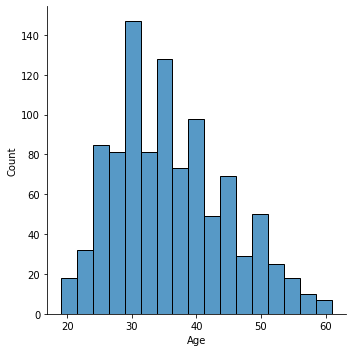

In [ ]:
# 5.1 Distribution of each continuous value using distplot()
#     https://seaborn.pydata.org/generated/seaborn.distplot.html
#     (Does not have **kwargs)

# 5.1.1 Age is slight skewed to right. Naturally density of younger
#       persons is high

sns.displot(ad.Age)

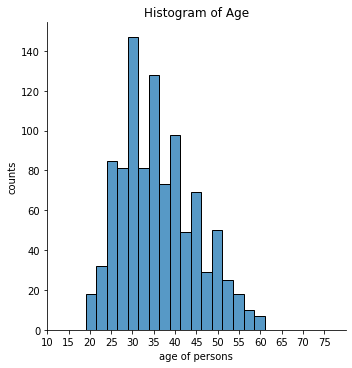

In [ ]:
# 5.1.2 Add more plot configurations
# Refer: https://matplotlib.org/api/axes_api.html#matplotlib-axes
ax= sns.displot(ad.Age)
ax.set( xlim =(10,80),                     #  sns.distplot does not have **kwargs
        xlabel= "age of persons",
        ylabel = "counts",
        title= "Histogram of Age",
        xticks = list(range(0,80,5))
        )

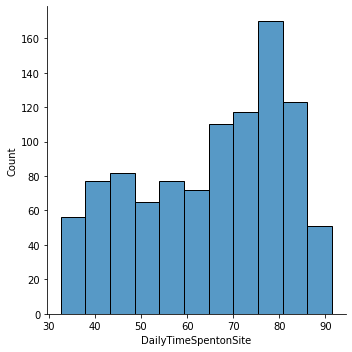

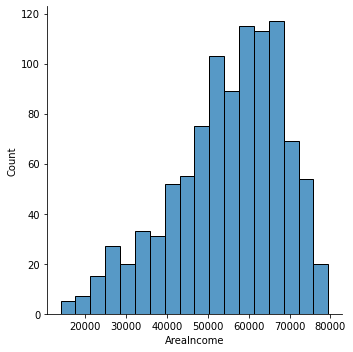

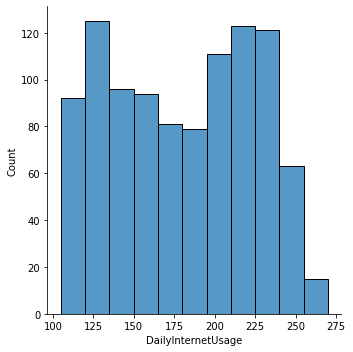

In [ ]:
# 5.1.2 Distribution of DailyTimeSpentonSite
sns.displot(ad.DailyTimeSpentonSite)
sns.displot(ad.AreaIncome)
sns.displot(ad.DailyInternetUsage)

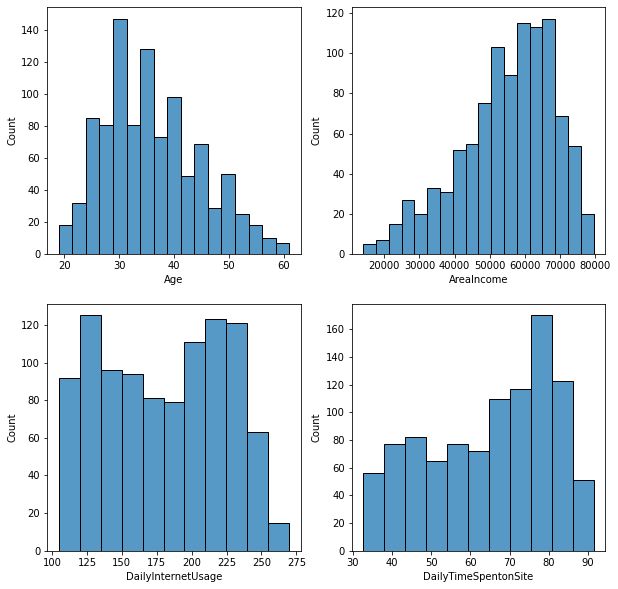

In [ ]:
# 5.1.3 Using for loop to plot all at once
columns = ['Age', 'AreaIncome', 'DailyInternetUsage', 'DailyTimeSpentonSite']
fig,ax = plt.subplots(2,2, figsize = (10,10))
ax = ax.flatten()
for i in range(len(columns)):
    sns.histplot(ad[columns[i]],ax = ax[i])


#### Box plots

[Diagram explanation](https://www.mathworks.com/matlabcentral/answers/461791-what-do-lines-that-double-back-on-themselves-mean-box-plots#answer_374762)

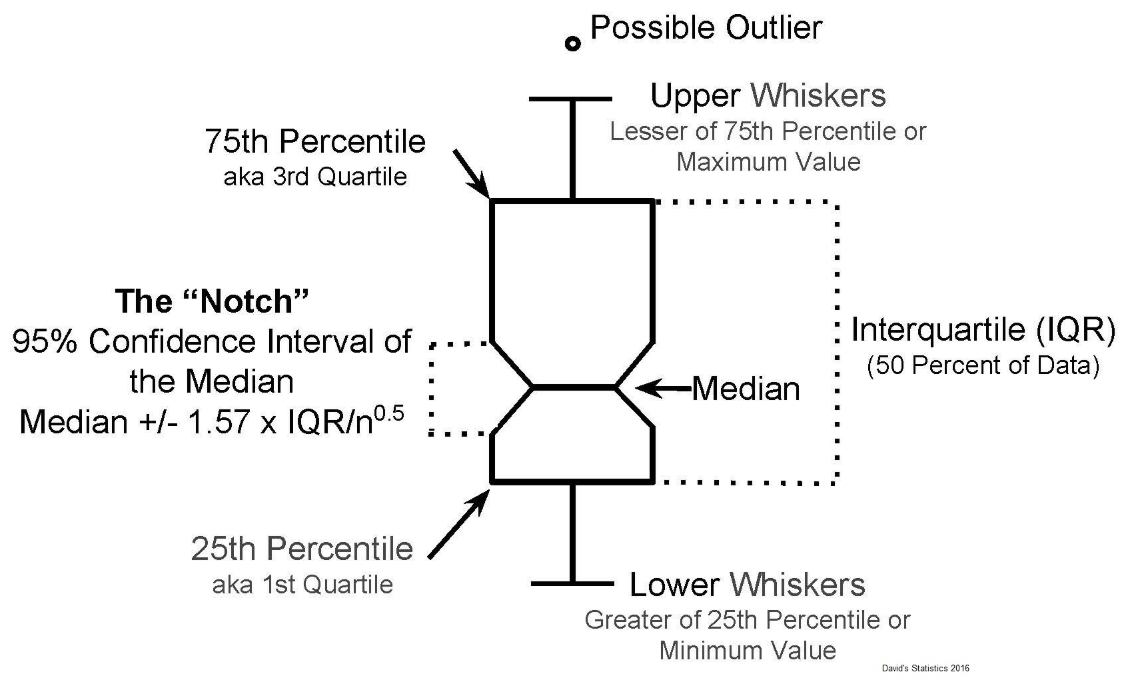

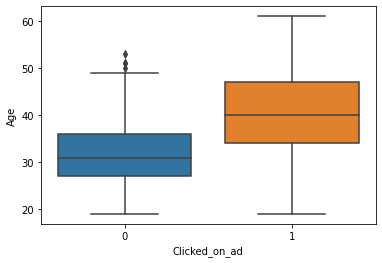

In [ ]:
# 6.0 Relationship of numeric variable with a categorical variable
# Question 4: How is 'Age' related to clicking?
# Question 5: How is DailyInternetUsage related to clicking?
# Question 6: How is 'AreaIncome' related to clicking?
#

# 6.1 One demo plot of relationship of 'Age' with 'Clicked_on_ad'
#     https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot

sns.boxplot(x = 'Clicked_on_ad',       # Discrete
            y = 'Age',                 # Continuous
            data = ad
            )

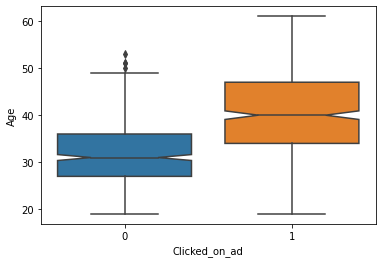

In [ ]:
sns.boxplot(x = 'Clicked_on_ad',       # Discrete
            y = 'Age',                 # Continuous
            data = ad,
            notch = True               # **kwargs. Not all kwargs are permitted
                                       #   From https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.boxplot.html#matplotlib.axes.Axes.boxplot
            )

In [ ]:
# 6.2 More such relationships through for-loop
columns = ['Age', 'AreaIncome', 'DailyInternetUsage', 'DailyTimeSpentonSite']
catVar = ['Clicked_on_ad', 'age_cat' ]


In [ ]:
# 6.3 Now for loop. First create pairs of cont and cat variables
mylist = [(cont,cat)  for cont in columns  for cat in catVar]
mylist


[('Age', 'Clicked_on_ad'),
 ('Age', 'age_cat'),
 ('AreaIncome', 'Clicked_on_ad'),
 ('AreaIncome', 'age_cat'),
 ('DailyInternetUsage', 'Clicked_on_ad'),
 ('DailyInternetUsage', 'age_cat'),
 ('DailyTimeSpentonSite', 'Clicked_on_ad'),
 ('DailyTimeSpentonSite', 'age_cat')]

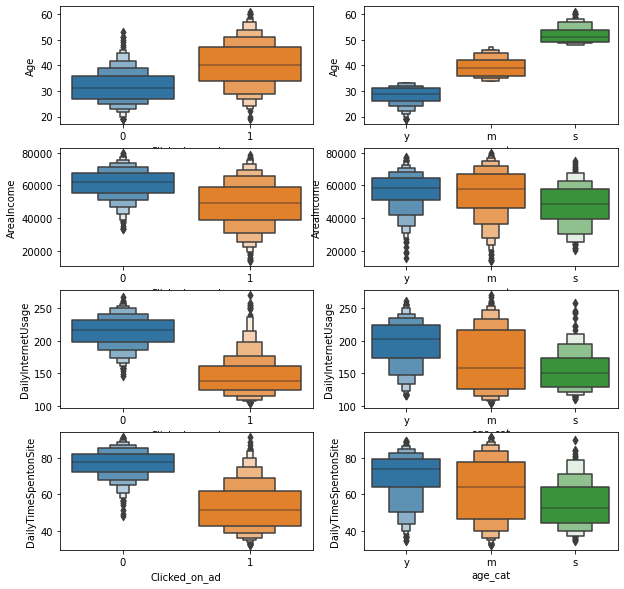

In [ ]:
# 6.4 Now run-through for-loop
#     For boxen plots, see:
#     https://stackoverflow.com/a/65894078/3282777

fig,ax = plt.subplots(4,2,figsize = (10,10))
ax = ax.flatten()
for j in range(len(mylist)):
    sns.boxenplot(x = mylist[j][1], y = mylist[j][0], data = ad, ax = ax[j])


What is a boxen plot?  
See [here](https://stackoverflow.com/questions/52403381/how-boxen-plot-is-different-from-box-plot) for explanations.

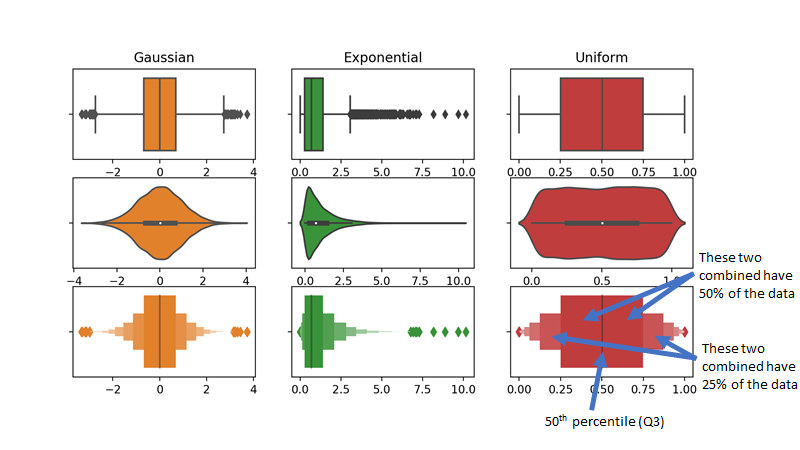

In [ ]:
# 7.0 Relationship of numeric to numeric variables
#     Using jointplots:
#           While jointplots may not show any linear relationship,
#           they can show by use of contour plots, given X, probable
#           Y through high density areas.

# Question 7: Show joint distribution of DailyTimeSpentonSite and AreaIncome
# Question 8: Show joint distribution of DailyInternetUsage and DailyTimeSpentonSite
# Question 9: Show these plots as kernel density as also 'hex' as also
#             draw regression line
#
# A jointplot = Scatterplot + Density plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


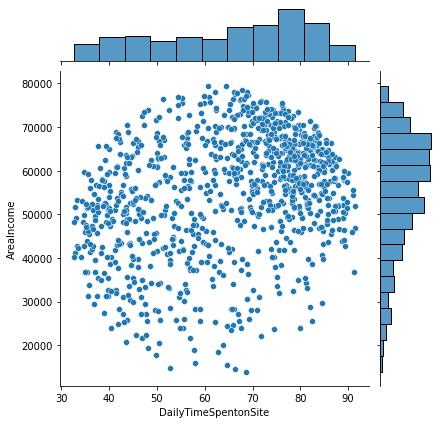

In [ ]:
# 7.1 Open first the following
sns.jointplot(ad.DailyTimeSpentonSite, ad.AreaIncome)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


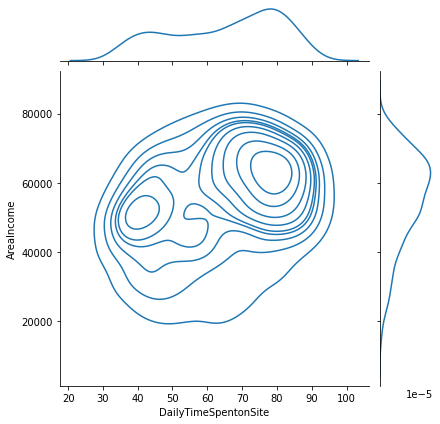

In [ ]:
# 7.2  and then this plot to understand meaning of colour intensity
#         in contour plots?
#      The graph shows that when DailyTimeSpentonSite is around 80
#      there is high probability that AreaIncome is around 60000/-

sns.jointplot(
               ad.DailyTimeSpentonSite, 
               ad.AreaIncome, 
               kind = "kde"        # Try also bw_adjust = 0.25 and then 1.0
               )


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


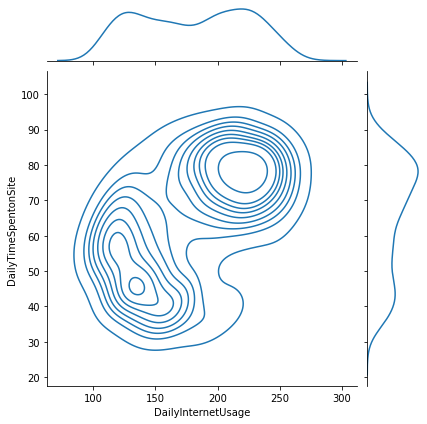

In [ ]:
# 7.3  Clearly two clusters are evident here
sns.jointplot(ad.DailyInternetUsage,
              ad.DailyTimeSpentonSite,
              kind = "kde"
              )


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


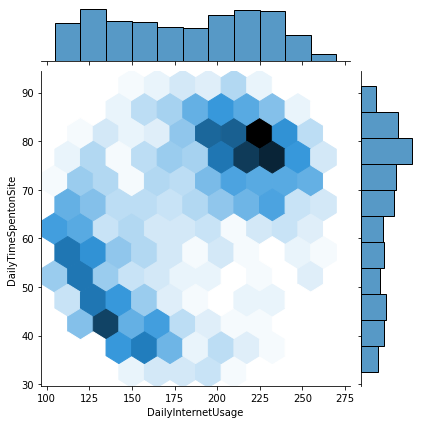

In [ ]:
# 7.4 Or plot hex plot
sns.jointplot(ad.DailyInternetUsage,
              ad.DailyTimeSpentonSite,
              kind = "hex"
              )


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


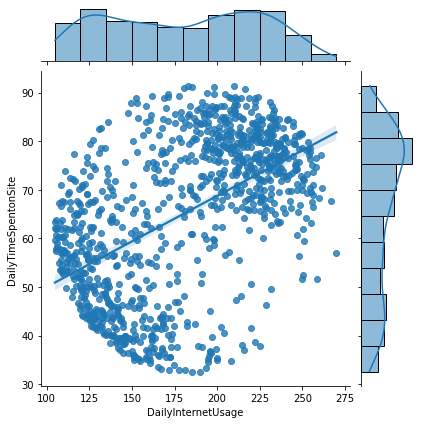

In [ ]:
# 7.5 Add regression and kernel density fits:
sns.jointplot(ad.DailyInternetUsage,
              ad.DailyTimeSpentonSite,
              kind = "reg"
              )


In [ ]:
# 8.0 Relationship of a categorical to another categorical variable

#     For example per category, count of other categories
#     And relationship of categorical to numeric variables
#     For example, compare per category mean(numeric) or sum(numeric)

# Question 10: What relationship exist between 'Clicked_on_ad' and 'Gender'?
# Question 11: What relationship exist between 'DailyTimeSpentonSite' and 'Gender'?
# Question 12: Relationship between Gender and Clicked_on_ad, subset by 'age_cat wise


In [ ]:
# 8.1 Note how seaborn uses estimator function
#     Barplots are grouped summaries, category wise
#     'estimator' is a summary function
#       For errobars, see this wikpedia on bootstrap statistics
#         https://en.wikipedia.org/wiki/Bootstrapping_(statistics)
#          Bootstrap statistics:
#          Repeatedly draw equal-sized samples of data (bootstrapping)
#           as in RandomForest & using these samples calculate 95% conf
#            interval, for example, np.sum and np.mean in the following cases


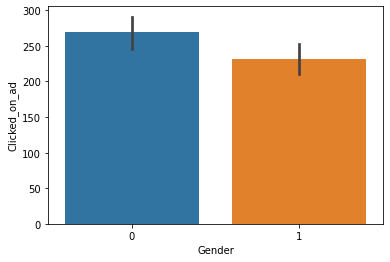

In [ ]:
sns.barplot(x = 'Gender',
            y = 'Clicked_on_ad',
            estimator = np.sum ,     # As there are multiple occurrences of Gender, sum up 'Clicked_on_ad'
            ci = 95,                 # Estimate default confidence interval using bootstrapping
            data = ad,               # Try np.mean also
            #capsize = 1
            )


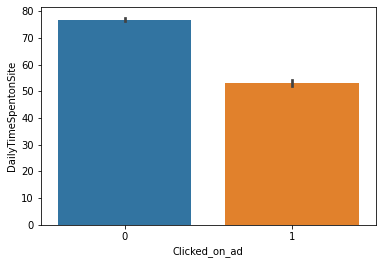

In [ ]:
# 8.2 Multiple ways of plotting similar information
sns.barplot(x = 'Clicked_on_ad',
            y = 'DailyTimeSpentonSite',
            estimator = np.mean,
            ci = 95,
            data =ad
            )


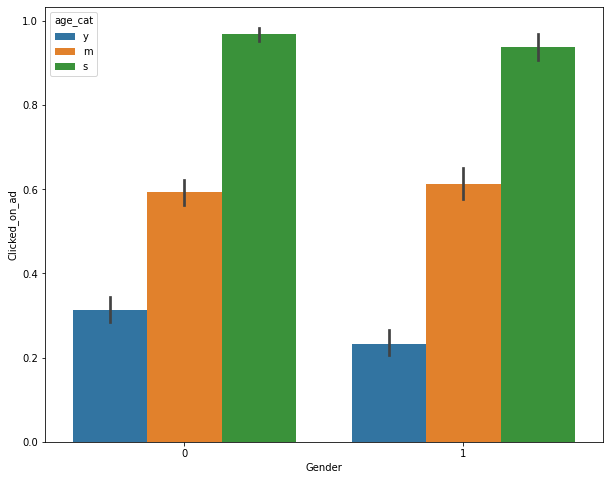

In [ ]:
# 8.3 Multiple ways of plotting similar information
fig = plt.figure(figsize = (10,8))
sns.barplot(x = 'Gender',
            y = 'Clicked_on_ad',
            hue = 'age_cat',       # Age-cat wise plots
            estimator = np.mean,
            ci = 68,
            data =ad)


In [ ]:
# 9.0 Relationship between two categorical and one numeric variable
#     Numeric variable has to be some summary measure. So, we have
#     to first calculate this summary measure
#
#     Matrix plots or heatmap
#    #########################

# Question 13: Hour and weekday wise when are clicks most
# Question 14: Quarter wise and weekday wise when are clicks most
# Question 15: Quarter wise and weekday wise when are DailyInternetUsage max and min

In [ ]:
# 9.1 When are total clicks more
#     Heatmap of hour vs weekday
#     X and Y labels are DataFrame indexes

grouped = ad.groupby(['hour', 'weekday'])
df_wh = grouped['Clicked_on_ad'].sum().unstack()
df_wh

weekday,0,1,2,3,4,5,6
hour,,,,,,,
1,16,16,30,19,25,15,26
2,18,21,15,20,17,17,21
3,14,13,13,13,13,20,14
4,14,3,16,12,10,8,5
5,8,2,2,11,6,2,7
6,2,0,3,4,0,2,7


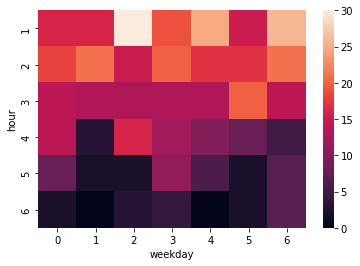

In [ ]:
# 9.2 Draw quickly the heatmap. For drawing heatmap,
#     When Pandas DataFrame is provided, the index & column
#     of DataFrame will be used to label the columns and rows
#      of heatmap.
#
sns.heatmap(df_wh)

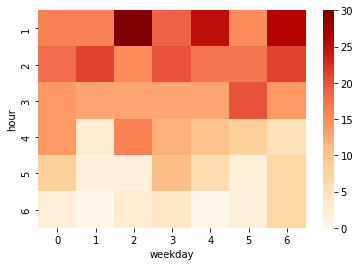

In [ ]:
# 9.2.1 For list of ready-made cmaps (plt.cm...), see:
#       https://matplotlib.org/tutorials/colors/colormaps.html
sns.heatmap(df_wh, cmap = plt.cm.OrRd)

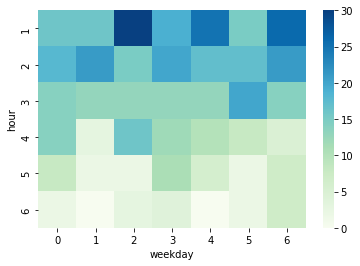

In [ ]:
sns.heatmap(df_wh, cmap = plt.cm.GnBu)

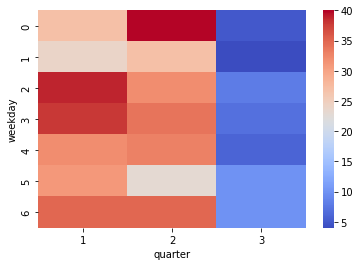

In [ ]:
# 9.3 Quarter vs weekday
grouped = ad.groupby(['weekday','quarter'])
df_wq = grouped['Clicked_on_ad'].sum().unstack()
sns.heatmap(df_wq, cmap = plt.cm.coolwarm)

quarter,1,2,3
weekday,,,
0,182.494915,177.449855,201.733333
1,177.471852,182.776842,196.530909
2,173.736962,170.933860,201.011500
3,176.725224,176.152097,182.150769
4,184.971507,180.533000,185.904167
5,174.449333,181.240625,168.043333
6,183.022254,185.774521,177.820667


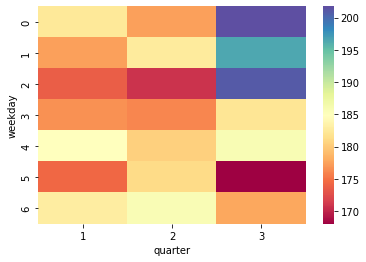

In [ ]:
# 9.4 In which quarter daily Internet usage is more
#     It is single categorical feature vs numeric summary
#     Appropriate plot is boxplot. So we add, one more
#     feature of 'weekday'
grouped = ad.groupby([ 'weekday','quarter'])
df_wqd = grouped['DailyInternetUsage'].mean().unstack()
df_wqd
sns.heatmap(df_wqd, cmap = plt.cm.Spectral)


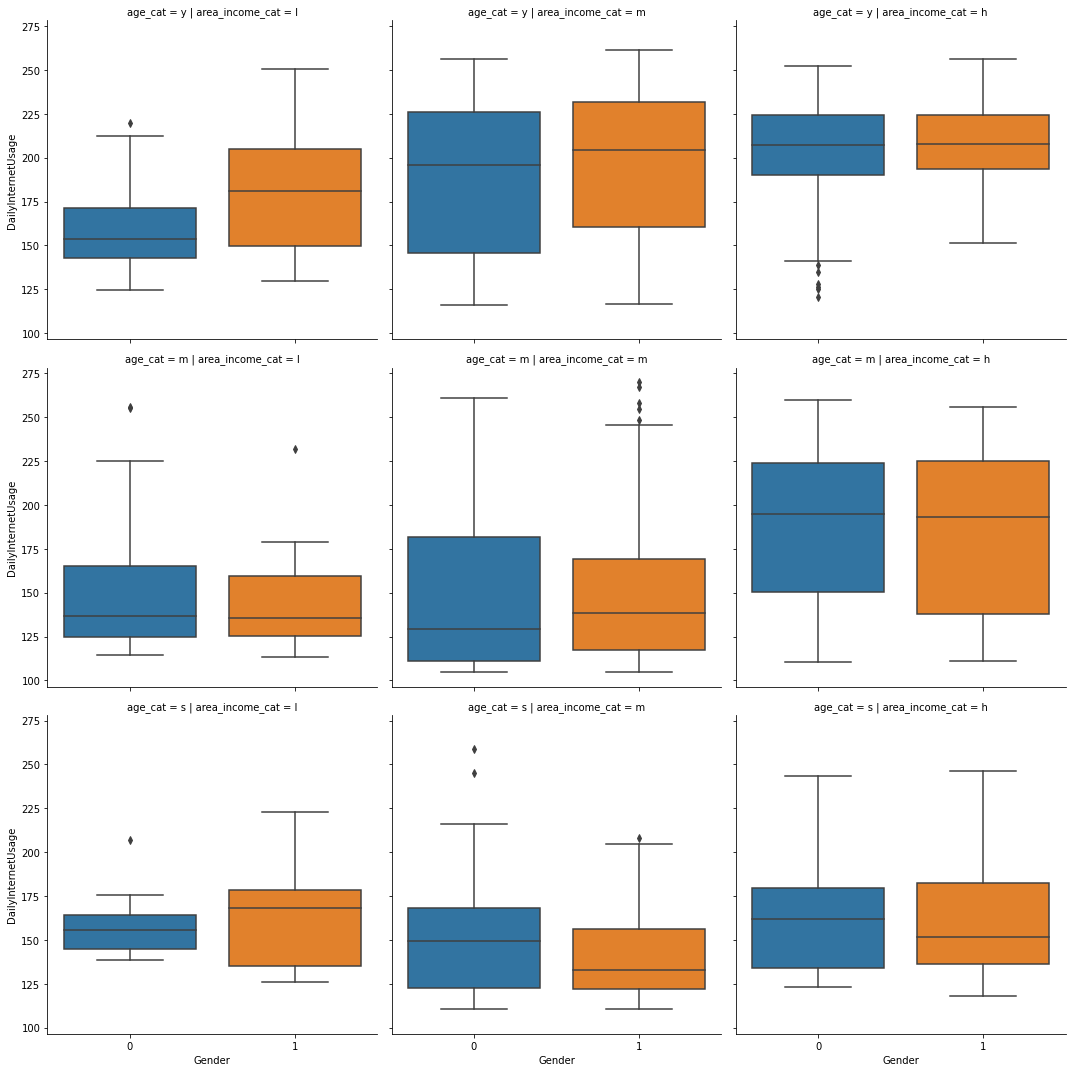

In [ ]:
# 10.0 Faceted plots: Show facets of relationships between
#      by numerous categorical variables
#      Facet plots
#      READ 'catplot' AS CONDITIONAL PLOTS

# 10.1
sns.catplot(x = 'Gender',
            y = 'DailyInternetUsage',
            row = 'age_cat' ,
            col = 'area_income_cat',
            kind = 'box',
            estimator = np.sum,
            data = ad)


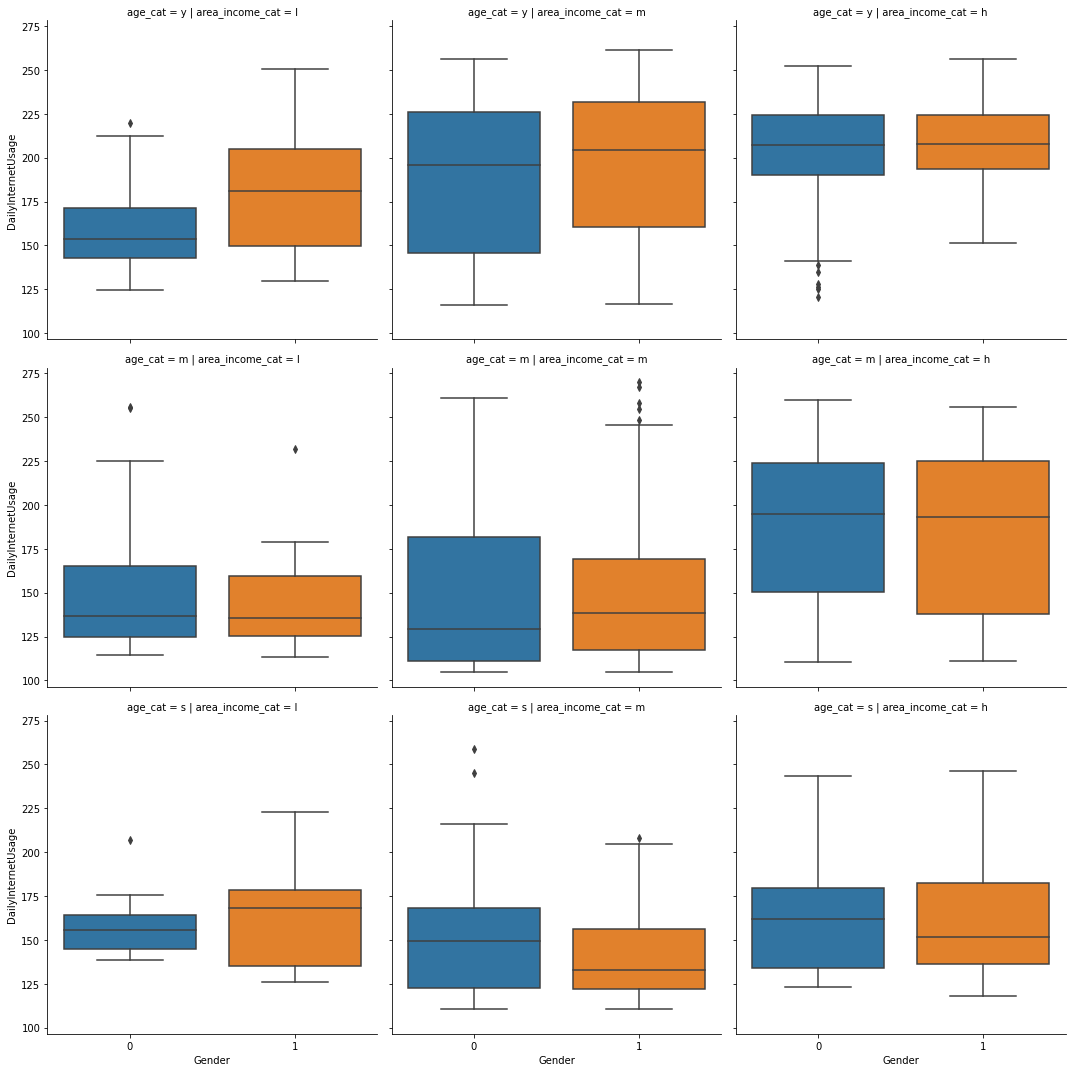

In [ ]:
# 10.0 Faceted plots: Show facets of relationships between
#      by numerous categorical variables
#      Facet plots
#      READ 'catplot' AS CONDITIONAL PLOTS

# 10.1
sns.catplot(x = 'Gender',
            y = 'DailyInternetUsage',
            row = 'age_cat' ,
            col = 'area_income_cat',
            kind = 'box',
            estimator = np.sum,
            data = ad)




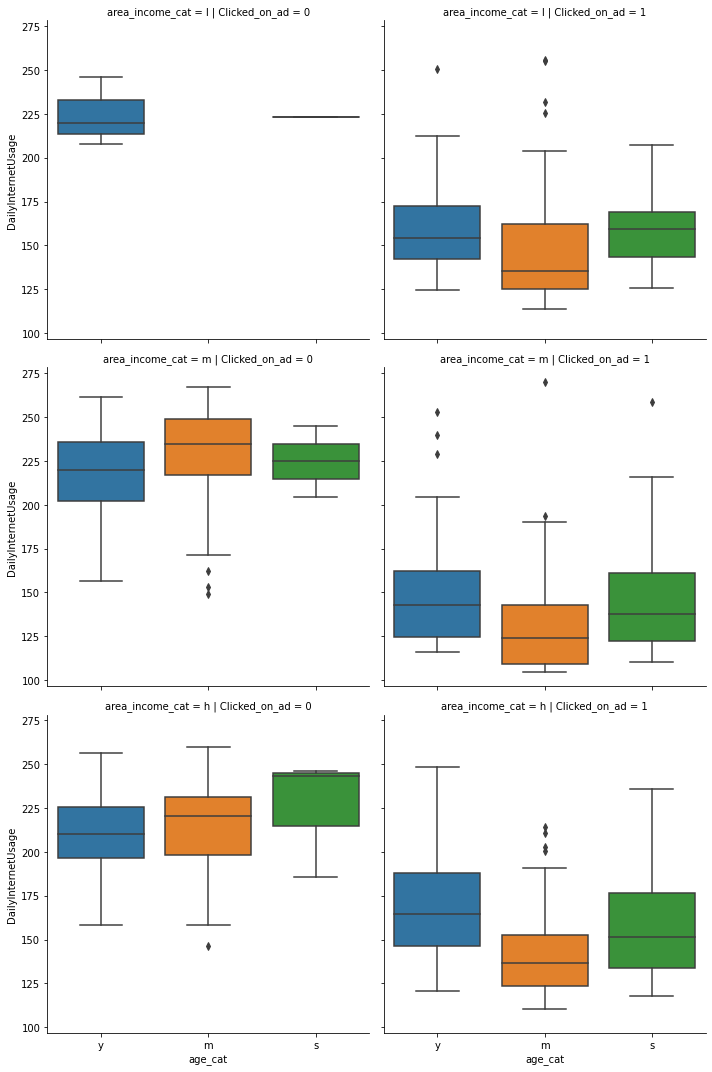

In [ ]:
# 10.2
sns.catplot(x = 'age_cat',
            y = 'DailyInternetUsage',
            row = 'area_income_cat',
            col = 'Clicked_on_ad',
            estimator = np.mean ,
            kind = 'box',
            data =ad)



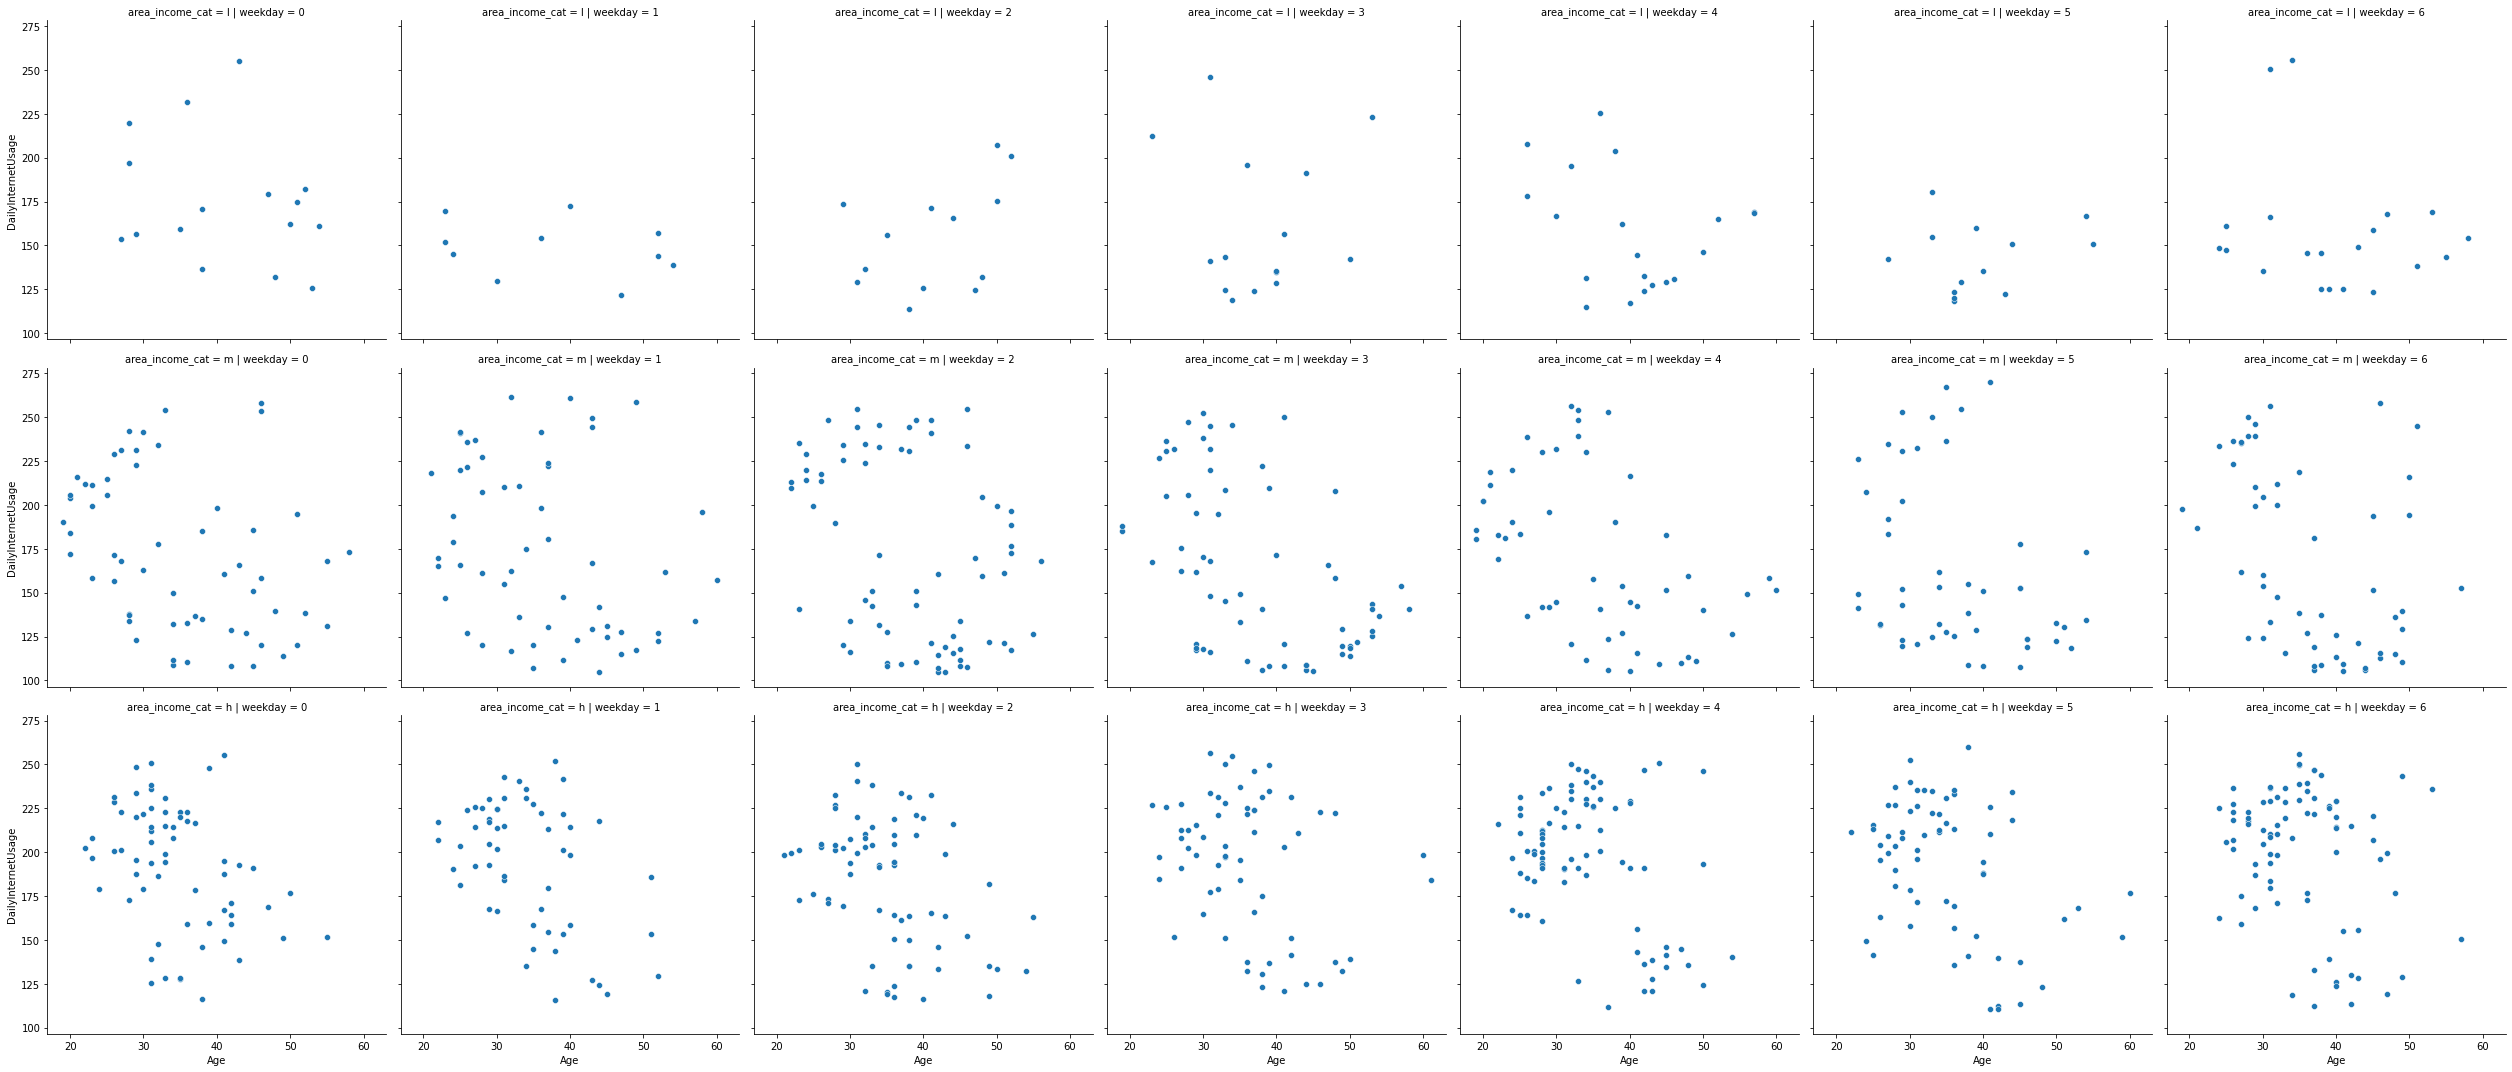

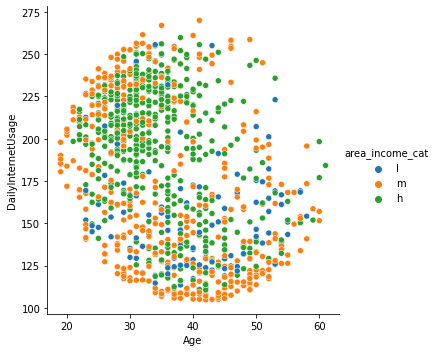

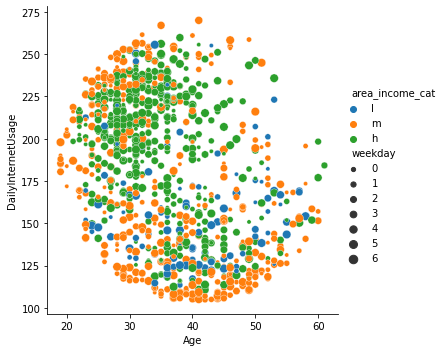

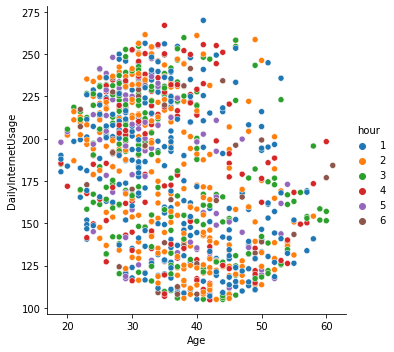

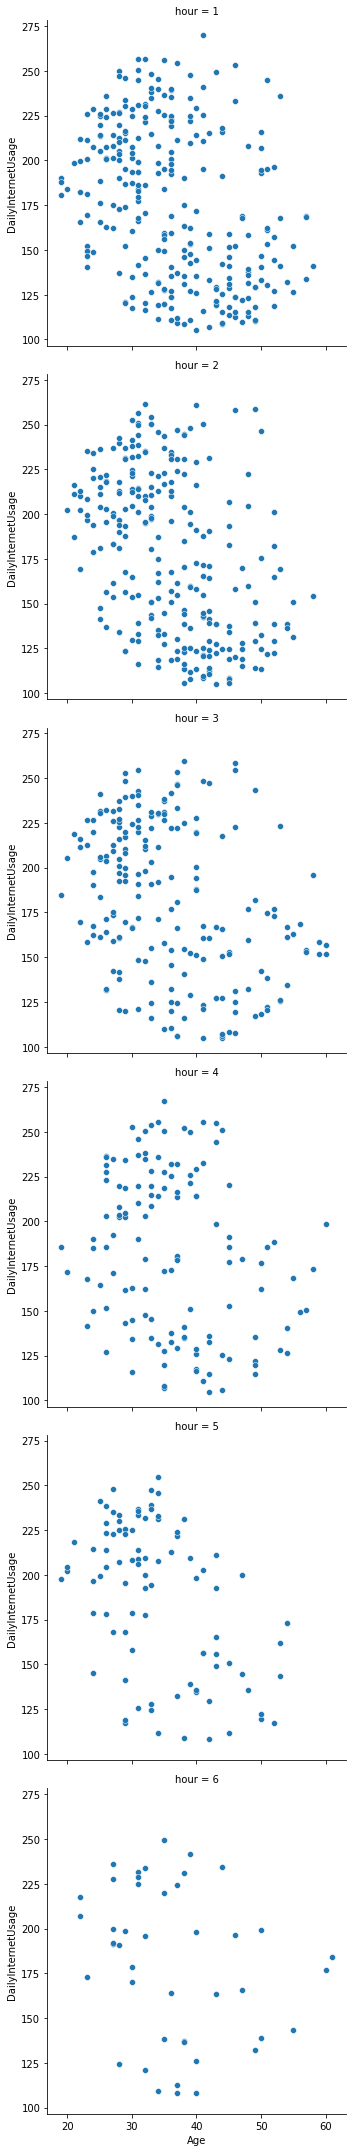

In [ ]:
# 10.3 Faceted scatter plots or relationship plots
sns.relplot(x = 'Age', y = 'DailyInternetUsage', row = 'area_income_cat', col = 'weekday', kind = 'scatter', data = ad)
sns.relplot(x = 'Age', y = 'DailyInternetUsage', hue = 'area_income_cat',  kind = 'scatter', data = ad, cmap = 'winter')
sns.relplot(x = 'Age', y = 'DailyInternetUsage', hue = 'area_income_cat', size = 'weekday', kind = 'scatter', data = ad)
sns.relplot(x = 'Age', y = 'DailyInternetUsage', hue = 'hour', kind = 'scatter', data = ad)
sns.relplot(x = 'Age', y = 'DailyInternetUsage', row = 'hour', kind = 'scatter', data = ad)



In [ ]:
############ End #####################